In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [21]:
digits = load_digits()

In [60]:
clf_gnb = LogisticRegression(penalty="none")

In [61]:
x_train_gnb, x_test_gnb, y_train_gnb, y_test_gnb = train_test_split(digits.data, digits.target)

In [62]:
clf_gnb.fit(x_train_gnb, y_train_gnb)

LogisticRegression(penalty='none')

In [63]:
predicted_gnb = clf_gnb.predict(x_test_gnb)
expected_gnb = y_test_gnb

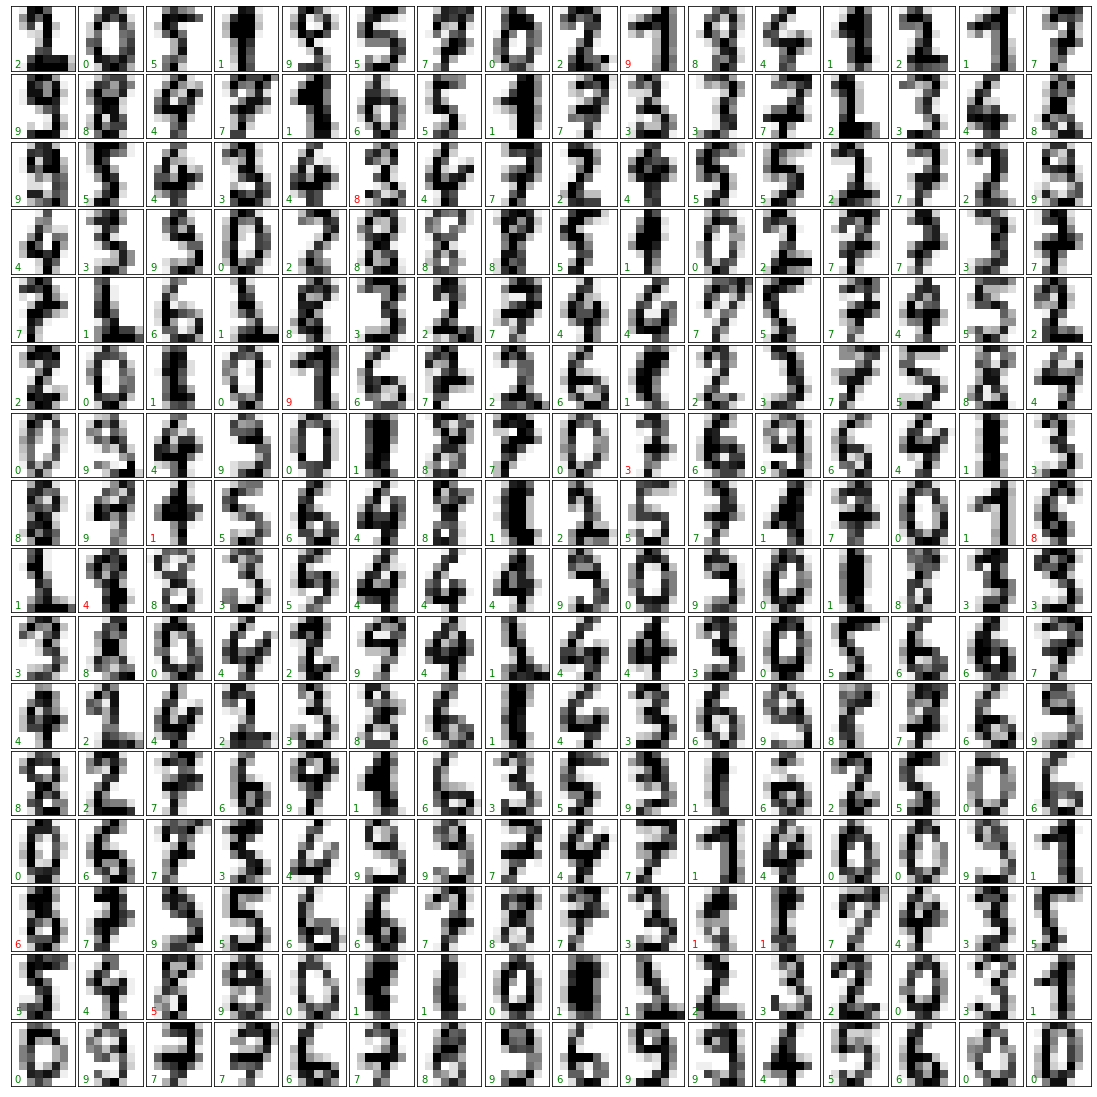

In [64]:
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(256):
    ax = fig.add_subplot(16, 16, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test_gnb.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')
    
    if predicted_gnb[i] == expected_gnb[i]:
        ax.text(0, 7, str(predicted_gnb[i]), color='green')
    else:
        ax.text(0, 7, str(predicted_gnb[i]), color='red')

In [55]:
print(metrics.classification_report(expected_gnb, predicted_gnb))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        44
           1       0.96      0.98      0.97        46
           2       1.00      1.00      1.00        44
           3       1.00      0.96      0.98        52
           4       0.98      0.93      0.95        45
           5       0.98      0.94      0.96        53
           6       1.00      0.96      0.98        45
           7       0.98      1.00      0.99        44
           8       0.87      0.92      0.89        37
           9       0.89      0.97      0.93        40

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.97      0.96      0.96       450



In [56]:
d_gnb = [array for array in metrics.confusion_matrix(expected_gnb, predicted_gnb)]
data_matrix_gnb = {"0": d_gnb[0], "1": d_gnb[1], "2": d_gnb[2], "3": d_gnb[3], "4": d_gnb[4], \
                   "5": d_gnb[5], "6": d_gnb[6], "7": d_gnb[7], "8": d_gnb[8], "9": d_gnb[9]}
df_matrix_gnb = pd.DataFrame(data=data_matrix_gnb)
df_matrix_gnb

,0,1,2,3,4,5,6,7,8,9
0,43,0,0,0,1,0,0,0,0,0
1,0,45,0,0,0,0,1,0,1,0
2,0,0,44,0,0,0,0,0,0,0
3,0,0,0,50,0,0,0,0,0,0
4,1,0,0,0,42,0,0,0,0,0
5,0,0,0,1,0,50,0,0,0,0
6,0,0,0,0,0,0,43,0,0,0
7,0,0,0,0,0,1,0,44,0,0
8,0,1,0,0,2,0,1,0,34,1
9,0,0,0,1,0,2,0,0,2,39
